# Part II - (Loan Data From Prosper)
## by (Muhsin Hameed)

## Investigation Overview


> **Loan Data From Prosper** explores about 114,000 persons who applied for loan, got it or not, and some variables around it. This investigation primarily examines some relationships between some of the variables such as Borrowers APR which is the Borrower's Annual Percentage Rate, Borrower's Rate, whether Borrowers are Home Owners and a few  categorization of Borrowers based on Prosper rating. 



## Dataset Overview

> The main data set contain 113937 row and 81 columns. All the columns ain't essential for this analysis, for that reason I would be working with 113937 row and 15 column. The details of the columns are below:

> <p> ✔ ListingNumber: The number that uniquely identifies the listing to the public as displayed on the website. </p>
> <p> ✔ Term: The length of the loan expressed in months. </p>
> <p> ✔ LoanStatus: The current status of the loan: <b> Cancelled, Chargedoff, Completed, Current, Defaulted,</b> </p>
> <p> ✔ FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.</p>
> <p> ✔ BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan. </p>
> <p> ✔ BorrowerRate: The Borrower's interest rate for this loan. </p>
> <p> ✔ ProsperRating: The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009. </p>
> <p> ✔ ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009. </p>
> <p> ✔ BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created. </p>
> <p> ✔ Occupation: The Occupation selected by the Borrower at the time they created the listing. </p>
> <p> ✔ EmploymentStatus:The employment status of the borrower at the time they posted the listing. </p>
> <p> ✔ IsBorrowerHomeOwner: A Borrower will be classified as a home-owner if they have a mortgage on their credit profile or provide documentation confirming they are a home-owner. </p>
> <p> ✔ IncomeRange: The income range of the borrower at the time the listing was created. </p>
> <p> ✔ LoanOriginalAmount: The origination amount of the loan. </p>
> <p> ✔ LoanOriginationDate: The date the loan was originated. </p>
> <p> ✔ Listing_Category: The category of the listing that the borrower selected when posting their listing </p>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# read the data set in to data frame
df=pd.read_csv('prosperLoanData.csv')

In [3]:
# creating a data frame for the columns that are needed in this analysis
columns=['ListingNumber','Term','LoanStatus','BorrowerAPR','BorrowerRate','ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','IsBorrowerHomeowner','IncomeRange','LoanOriginalAmount','LoanOriginationDate']
loan_data=df[columns]

In [4]:
# making a copy of the data set
loan=loan_data.copy()

In [5]:
# changing loan origination date to date type data
loan['LoanOriginationDate']=loan.loc[:,'LoanOriginationDate'].apply(pd.to_datetime, errors='coerce')

In [6]:
# renaming the columns
loan=loan.rename(columns={"ProsperRating (Alpha)":"ProsperRating","ListingCategory (numeric)":"ListingCategory"})

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

### Do Prosper Rating and Prosper Score affect Borrower APR ?

> The observation from the plots showed that the higher the ratings, the lower the borrower APR. This implies that to have a good rating, ones APR must be below 0.1%

> The box plot shows an inverse relationship, which means the APR is significant to have a good rating and proper score



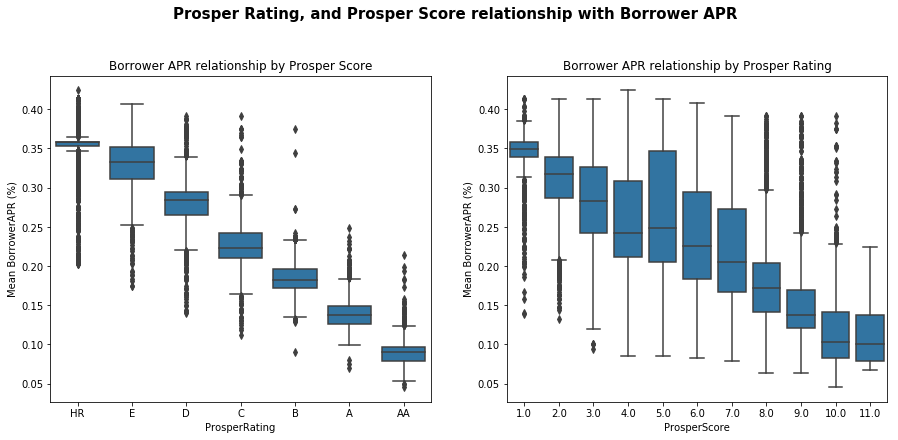

In [7]:
# seting the rating prosper rating order
rating=['HR','E','D','C','B','A','AA']
# ordering it into a categorical type data
rate_set = pd.api.types.CategoricalDtype(ordered=True, categories=rating)
# setting it into the prosper rating
loan['ProsperRating'] = loan['ProsperRating'].astype(rate_set);
# setting the plot size
fig, ax = plt.subplots(ncols = 2, figsize = [15,6])
# creating colour palette
colour= sb.color_palette()[0]
sb.boxplot(data=loan, x='ProsperRating', y='BorrowerAPR',ax = ax[0], color=colour);
ax[0].set_title('Borrower APR relationship by Prosper Score')
ax[0].set_ylabel('Mean BorrowerAPR (%)')
# creating the second plot for the variable 
sb.boxplot(data=loan, x='ProsperScore', y='BorrowerAPR', ax = ax[1],color=colour)
ax[1].set_title('Borrower APR relationship by Prosper Rating')
ax[1].set_ylabel('Mean BorrowerAPR (%)');
plt.suptitle("Prosper Rating, and Prosper Score relationship with Borrower APR", y = 1.04,fontsize=15,weight=("bold"));

## (Visualization 2)
### How does the Borrower APR affect loan and HomeOwnership?

> The disribution shows that the borrowers APR had no effect on home ownership. Although, the loan amount had an inverse relationship with borrower APR,the bigger your loan amount, the lower your APR rate.

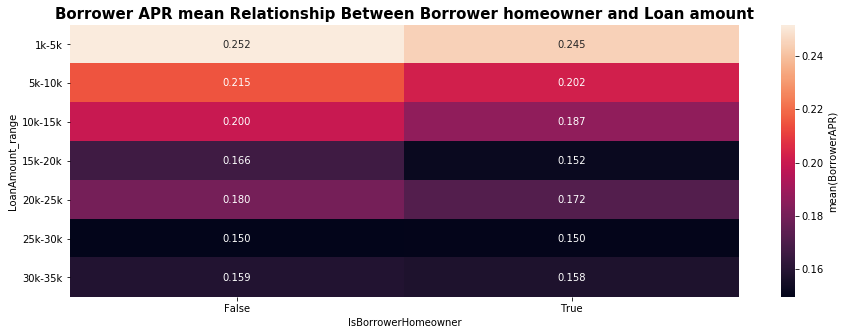

In [8]:
# using the pd.cut to set the Loan amount into range 
loan['LoanAmount_range']=pd.cut(loan.LoanOriginalAmount,bins=[1000,5000,10000,15000,20000,25000,30000,35000],labels=['1k-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
# adding the borrower APR to the chat
group=loan.groupby(['LoanAmount_range','IsBorrowerHomeowner']).mean()['BorrowerAPR']
group=group.reset_index(name='BorrowerAPR_mean')
group=group.pivot(index = 'LoanAmount_range', columns = 'IsBorrowerHomeowner', values = 'BorrowerAPR_mean')
plt.figure(figsize = [15, 5]);
sb.heatmap(group,annot = True, fmt = '.3f',cbar_kws = {'label' : 'mean(BorrowerAPR)'});
plt.title('Borrower APR mean Relationship Between Borrower homeowner and Loan amount',fontsize=15,weight=("bold"));

## (Visualization 3)
### Does the loan term have a significant effect on the loan and APR?

> The plot below revealed that the longer termed loans(5 years) had higher borrower APR. By implication, the longer the loan term, the higher their API gets.

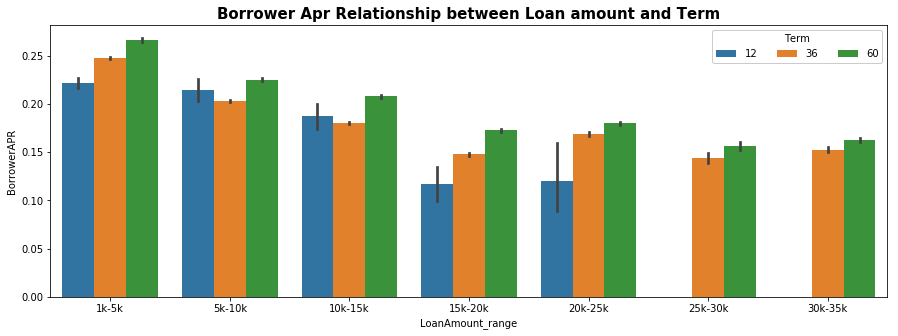

In [9]:
# creating a bar plot for the distribution
plt.figure(figsize = [15, 5]);
yx=sb.barplot(data=loan,x='LoanAmount_range',y='BorrowerAPR',hue='Term');
yx.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Term');
plt.title("Borrower Apr Relationship between Loan amount and Term",fontsize=15,weight=("bold"));

### Key Insights for Presentation

The investigation had a different view when using the amount collected and the loan term on how they affect the borrowers APR. The higher the APR, the lower the loan collected. However, using the term showed that the longer the term which loan was collected regardless of the amount, the higher the APR gets.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 365591 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/